In [1]:
# Análise de Salários em Tecnologia vs Custo de Vida

In [2]:
## Este projeto analisa a relação entre salários médios na área de tecnologia e o custo de vida em diferentes países, com o objetivo de avaliar o poder de compra relativo.

In [3]:
import pandas as pd

In [4]:
# Introdução

In [5]:
## Carregamento de dados

In [6]:
## Foram utilizados dois conjuntos de dados: - Salários globais em tecnologia - Índices de custo de vida por país

In [7]:
df = pd.read_csv("global_tech_salary[1].txt")

In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M


In [9]:
## Exploração inicial dos dados salariais

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   experience_level    5000 non-null   object
 2   employment_type     5000 non-null   object
 3   job_title           5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_currency     5000 non-null   object
 6   salary_in_usd       5000 non-null   int64 
 7   employee_residence  5000 non-null   object
 8   remote_ratio        5000 non-null   int64 
 9   company_location    5000 non-null   object
 10  company_size        5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


In [11]:
df["employee_residence"].value_counts().head(10)

employee_residence
US    4388
GB     198
CA     116
ES      52
DE      34
IN      21
FR      21
AU      14
PT      13
BR      10
Name: count, dtype: int64

In [12]:
## Criando a base para comparação de média salarial dos principais países

In [13]:
## Critério de amostra mínima

In [14]:
## Para garantir maior robustez estatística, a análise principal foi restrita a países com pelo menos 50 registros. Países com menor volume de dados foram analisados separadamente de forma exploratória.

In [15]:
country_counts = df['employee_residence'].value_counts()


In [16]:
countries_large = country_counts[country_counts >= 50].index
countries_small = country_counts[country_counts < 50].index


In [17]:
df_large = df[df['employee_residence'].isin(countries_large)]
df_small = df[df['employee_residence'].isin(countries_small)]


In [18]:
df_large.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)


employee_residence
US    156599.363036
CA    145437.155172
GB     95679.141414
ES     59718.346154
Name: salary_in_usd, dtype: float64

In [19]:
## Análise de salários médios por país (amostra robusta). Observa-se que os Estados Unidos e o Canadá apresentam os maiores salários médios em tecnologia, com valores relativamente próximos. O Reino Unido ocupa uma posição intermediária, enquanto a Espanha apresenta salários médios significativamente menores. É importante destacar que esta análise considera apenas o salário nominal, não levando em conta o custo de vida de cada país.


In [20]:
## Integração com dados de custo de vida

In [21]:
df_cost = pd.read_csv("Cost_of_Living_Index_by_Country_2024.csv")


In [22]:
df_cost.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [23]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB


In [24]:
country_map = {
    "United States": "US",
    "Canada": "CA",
    "United Kingdom": "GB",
    "Spain": "ES"
}


In [25]:
df_cost["country_code"] = df_cost["Country"].map(country_map)


In [26]:
df_cost[["Country", "country_code"]].dropna()


,Country,country_code
8,United States,US
11,Canada,CA
21,United Kingdom,GB
39,Spain,ES


In [27]:
df_cost_filtered = df_cost[df_cost["country_code"].notna()]


In [28]:
df_cost_filtered["country_code"].value_counts()


country_code
US    1
CA    1
GB    1
ES    1
Name: count, dtype: int64

In [29]:
df_cost_filtered["country_code"].value_counts()


country_code
US    1
CA    1
GB    1
ES    1
Name: count, dtype: int64

In [30]:
## Como os datasets utilizam formatos diferentes para representar os países (código ISO e nome completo), foi realizado um mapeamento manual para permitir a integração correta das informações.

In [31]:
df_merged = pd.merge(
    df_large,
    df_cost_filtered,
    left_on="employee_residence",
    right_on="country_code",
    how="inner"
)


In [32]:
df_merged.shape

(4754, 20)

In [33]:
df_merged.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,country_code
0,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M,9,United States,70.4,41.7,56.6,75.0,67.2,142.3,US
1,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M,9,United States,70.4,41.7,56.6,75.0,67.2,142.3,US
2,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M,9,United States,70.4,41.7,56.6,75.0,67.2,142.3,US
3,2023,EX,FT,Machine Learning Engineer,145000,USD,145000,US,100,US,M,9,United States,70.4,41.7,56.6,75.0,67.2,142.3,US
4,2022,SE,FT,Data Scientist,130000,USD,130000,US,100,US,M,9,United States,70.4,41.7,56.6,75.0,67.2,142.3,US


In [34]:
## Cálculo do poder de compra

In [35]:
df_merged["employee_residence"].value_counts()


employee_residence
US    4388
GB     198
CA     116
ES      52
Name: count, dtype: int64

In [36]:
df_merged["purchase_power"] = (
    df_merged["salary_in_usd"] / df_merged["Cost of Living Index"]
)


In [37]:
purchase_power_by_country = (df_merged
    .groupby("employee_residence")["purchase_power"]
    .mean()
    .sort_values(ascending=False))


In [38]:
## O poder de compra foi estimado como a razão entre o salário médio (em USD) e o índice de custo de vida de cada país. Essa métrica permite uma comparação relativa entre países.

In [39]:
## Poder de compra

In [40]:
purchase_power_by_country


employee_residence
CA    2244.400543
US    2224.422770
GB    1543.211958
ES    1262.544316
Name: purchase_power, dtype: float64

In [46]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


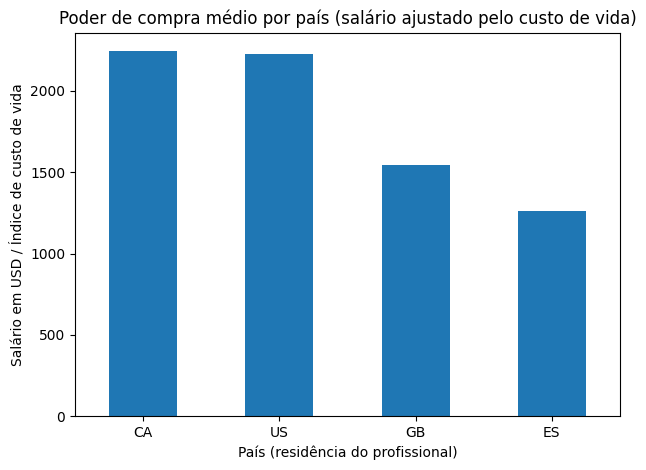

In [47]:
ax = purchase_power_by_country.plot(kind="bar")
ax.set_title("Poder de compra médio por país (salário ajustado pelo custo de vida)")
ax.set_xlabel("País (residência do profissional)")
ax.set_ylabel("Salário em USD / Índice de custo de vida")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

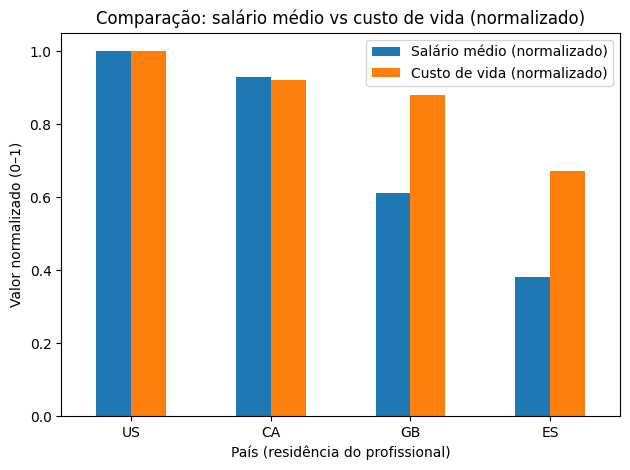

In [48]:
avg_salary_by_country = (
    df_merged.groupby("employee_residence")["salary_in_usd"]
    .mean()
    .sort_values(ascending=False)
)

cost_index_by_country = (
    df_merged.groupby("employee_residence")["Cost of Living Index"]
    .mean()
    .loc[avg_salary_by_country.index]  # alinha na mesma ordem
)

plot_df = (
    plt.figure()
)

compare = (
    (avg_salary_by_country / avg_salary_by_country.max()).rename("Salário médio (normalizado)")
    .to_frame()
    .join((cost_index_by_country / cost_index_by_country.max()).rename("Custo de vida (normalizado)"))
)

ax = compare.plot(kind="bar")
ax.set_title("Comparação: salário médio vs custo de vida (normalizado)")
ax.set_xlabel("País (residência do profissional)")
ax.set_ylabel("Valor normalizado (0–1)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [41]:
### Para avaliar o poder de compra relativo, foi calculada a razão entre o salário em USD e o índice de custo de vida de cada país. Essa métrica permite comparar onde o salário oferece maior capacidade de consumo, considerando diferenças no custo médio de vida.

In [42]:
# Conclusão:

In [43]:
##  Embora os Estados Unidos apresentem o maior salário médio absoluto, outros países demonstram poder de compra competitivo quando ajustado pelo custo de vida, evidenciando que salários mais altos nem sempre representam melhor qualidade de vida.